In [545]:
import pandas as pd


# calculate varations

In [546]:
def add_variation_column(df, column_name):
    variations = [None]  # Initialize the list of variations with None for the first row
    for i in range(1, len(df)):
        diff = df[column_name].iloc[i] - df[column_name].iloc[i-1]
        variations.append(diff)
    df[f'variation_{column_name}'] = variations
    return df

# read the data from  data_kick.xlsx forme folder machine learning algorithem test
or use the file from dataset folder the varaiation is calculated

In [874]:
df=pd.read_excel(r'C:\Users\hp\Desktop\M2\PFE\Code\code pfe\dataset\15.xlsx')


In [875]:
df[df['STATUS']==1].index

Int64Index([3349, 3350, 3351, 3352, 3353, 3354, 3355, 3356, 3357, 3358,
            ...
            3477, 3478, 3479, 3480, 3481, 3482, 3483, 3484, 3485, 3486],
           dtype='int64', length=138)

In [633]:
df['Unnamed: 45'].unique()

array([nan, 'TVA + GAZA'], dtype=object)

In [708]:
cols11=['TVA (m3)', 'SPPA (kPa)', 'MFOP ((m3/s)/(m3/s))',
       'GASA (mol/mol)']


In [876]:
data=df[cols11][:3550].copy()


In [877]:
for column_name in cols11:
    data=add_variation_column(data, column_name)

In [878]:
data=data.dropna()

In [479]:
df.shape

(16348, 47)

In [879]:
data['STATUS']=df['STATUS'][1:]

In [841]:
data.shape

(5199, 9)

In [880]:
data.head()

,TVA (m3),SPPA (kPa),MFOP ((m3/s)/(m3/s)),GASA (mol/mol),variation_TVA (m3),variation_SPPA (kPa),variation_MFOP ((m3/s)/(m3/s)),variation_GASA (mol/mol),STATUS
1,75.894363,16293.013418,0.158355,0.003422,-0.015274,6.229861,0.000014,0.000093,0
2,75.896378,16294.969399,0.158355,0.003419,0.002015,1.955981,0.000000,-0.000003,0
3,75.883698,16307.425750,0.158396,0.003420,-0.012680,12.456351,0.000041,0.000001,0
4,75.871750,16305.350249,0.158355,0.003413,-0.011948,-2.075501,-0.000041,-0.000007,0
5,75.905716,16298.266968,0.158360,0.003422,0.033966,-7.083281,0.000005,0.000009,0


In [881]:
data[data['STATUS']==1].index

Int64Index([3349, 3350, 3351, 3352, 3353, 3354, 3355, 3356, 3357, 3358,
            ...
            3477, 3478, 3479, 3480, 3481, 3482, 3483, 3484, 3485, 3486],
           dtype='int64', length=138)

In [752]:
data.columns

Index(['TVA (m3)', 'SPPA (kPa)', 'MFOP ((m3/s)/(m3/s))', 'GASA (mol/mol)',
       'variation_TVA (m3)', 'variation_SPPA (kPa)',
       'variation_MFOP ((m3/s)/(m3/s))', 'variation_GASA (mol/mol)', 'STATUS'],
      dtype='object')

# rename the columns for column name issus

In [882]:
data = data.rename(columns={'variation_GASA (mol/mol)': 'variation_GASA'})
data = data.rename(columns={'variation_SPPA (kPa)':'variation_SPPA'})
data = data.rename(columns={'variation_MFOP ((m3/s)/(m3/s))': 'variation_MFOP'})
data = data.rename(columns={'variation_TVA (m3)': 'variation_TVA'})


In [722]:
cols0=['TVA (m3)', 'SPPA (kPa)', 'MFOP ((m3/s)/(m3/s))',
       'GASA (mol/mol)','STATUS']


array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

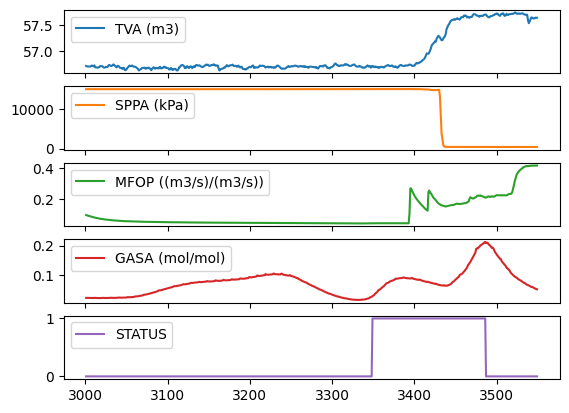

In [883]:
cols1=['GASA (mol/mol)','variation_SPPA','variation_MFOP','variation_TVA','STATUS']
data[cols0][3000:].plot(subplots=True)

In [ ]:
0,0.1,0,0

In [513]:
data[data['STATUS']==1].index

Int64Index([5067, 5068, 5069, 5070, 5071, 5072, 5073, 5074, 5075, 5076,
            ...
            5178, 5179, 5180, 5181, 5182, 5183, 5184, 5185, 5186, 5187],
           dtype='int64', length=121)

In [514]:
data.columns


Index(['TVA (m3)', 'SPPA (kPa)', 'MFOP ((m3/s)/(m3/s))', 'GASA (mol/mol)',
       'variation_TVA', 'variation_SPPA', 'variation_MFOP', 'variation_GASA',
       'STATUS', 'kick_recognition'],
      dtype='object')

In [561]:
c=['TVA (m3)', 'SPPA (kPa)', 'MFOP ((m3/s)/(m3/s))','GASA (mol/mol)']
l={'TVA (m3)':[], 'SPPA (kPa)':[], 'MFOP ((m3/s)/(m3/s))':[],'GASA (mol/mol)':[]}

In [562]:
k=36

for i in c:
    s=5067  
    while s<5187: 
        l[i].append(data[i][s:s+k].diff().mean())
        s=s+1
        

In [564]:
import numpy as np
for i in l:
    print(i,np.mean(l[i]))

TVA (m3) 0.006752134753210117
SPPA (kPa) -0.2642442682443206
MFOP ((m3/s)/(m3/s)) -0.0005100415093558174
GASA (mol/mol) 0.001874102380952382


In [ ]:
 0.030,0.01,3.93, 0.005

# this the function we deal with

In [884]:
def feature_rep(window, thrsh_tva, thrsh_gasa, thrsh_spp, thrsh_mfop):
    # threshold for each feature mean of the feature when the kick is happen
    gasa = window['GASA (mol/mol)'].mean()
    tva = window['variation_TVA'].mean()
    spp = window['variation_SPPA'].mean()
    mfop = window['variation_MFOP'].mean()
# gasa pas de variasion
    l = []
    if tva > thrsh_tva and mfop < thrsh_mfop and gasa > thrsh_gasa:  # well 19
        l = [int(gasa > thrsh_gasa), int(tva > thrsh_tva),
             int(mfop < thrsh_mfop), int(spp < thrsh_spp)]

        return 1, l
    if gasa > thrsh_gasa and tva > thrsh_tva and spp < thrsh_spp:  # well 15
        l = [int(gasa > thrsh_gasa), int(tva > thrsh_tva),
             int(mfop < thrsh_mfop), int(spp < thrsh_spp)]

        return 1, l
    elif gasa > thrsh_gasa and mfop < thrsh_mfop and spp < thrsh_spp:  # well 6,8
        l = [int(gasa > thrsh_gasa), int(tva > thrsh_tva),
             int(mfop < thrsh_mfop), int(spp < thrsh_spp)]
        return 1,l

    #     return 1, l
    if gasa > thrsh_gasa and tva > thrsh_tva and mfop < thrsh_mfop and spp < thrsh_spp:  # well 26,29
        l = [int(gasa > thrsh_gasa), int(tva > thrsh_tva),
             int(mfop < thrsh_mfop), int(spp < thrsh_spp)]
        return 1, l
    else:

        l = [int(gasa > thrsh_gasa), int(tva > thrsh_tva),
             int(mfop < thrsh_mfop), int(spp < thrsh_spp)]
        return 0, l

In [910]:
data['kick_recognition']=111
# thrsh_tva, thrsh_gasa, thrsh_spp, thrsh_mfop =1, 0.035, 0.1, 0#well 6,8
# thrsh_tva, thrsh_gasa, thrsh_spp, thrsh_mfop =0,0.01,0,0#well 26
thrsh_tva, thrsh_gasa, thrsh_spp, thrsh_mfop =0.01, 0.01, 0, 0#15
# thrsh_tva, thrsh_gasa, thrsh_spp, thrsh_mfop =0.001, 0.03, -1, 0#17
# thrsh_tva, thrsh_gasa, thrsh_spp, thrsh_mfop =0.01, 0.03, -0.08,0#19
# thrsh_tva, thrsh_gasa, thrsh_spp, thrsh_mfop =0.01, 0.1,0.02,0.1#29
# thrsh_tva, thrsh_gasa, thrsh_spp, thrsh_mfop = 0.1,0.1,0, 0.005#29
# thrsh_tva, thrsh_gasa, thrsh_spp, thrsh_mfop=0,0.03,-1,0
window_size = 180
window_size = window_size//5
positive=0
train_data=[]
d=[]
for i in range(len(data)-window_size+1):
    p=False
    window = data.iloc[i:i+window_size]
    
    data['kick_recognition'][i:i+window_size+1],b = feature_rep(
        window, thrsh_tva, thrsh_gasa, thrsh_spp, thrsh_mfop, p)
    
    # b.append(data.iloc[i,-1:][0]) #append df[kick_recognitin][i]
    # train_data.append(b)
        
    # if window['kick_recognition'].sum()>0 and window['STATUS'].sum()>0:
    #     positive+=1

C:\Users\hp\AppData\Local\Temp\ipykernel_6220\3053717110.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['kick_recognition'][i:i+window_size+1],b = feature_rep(


# calculate the accuracy

In [911]:

ACC = sum((data['STATUS'] == data['kick_recognition'])) / \
    data.shape[0]  # calculate accuracy of algorithm
data_kik = data[data['STATUS'] == 1]  # for get just where status=1
statu_acc = sum((data_kik['STATUS'] == data_kik['kick_recognition']))/data_kik.shape[0]
print('accuracy: ', ACC, 'accuracy status', statu_acc)

accuracy:  0.9549168779938011 accuracy status 0.391304347826087


# convert train data for plot issus

In [912]:
cols=['GASA (mol/mol)','TVA (m3)','MFOP ((m3/s)/(m3/s))', 'SPPA (kPa)' ,
       'detection de kick']
dftest = pd.DataFrame(train_data, columns=cols)
dftest['STATUS']=data['STATUS']
dftest['detection de kick'].value_counts()

0.0    3384
1.0     130
Name: detection de kick, dtype: int64

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
      dtype=object)

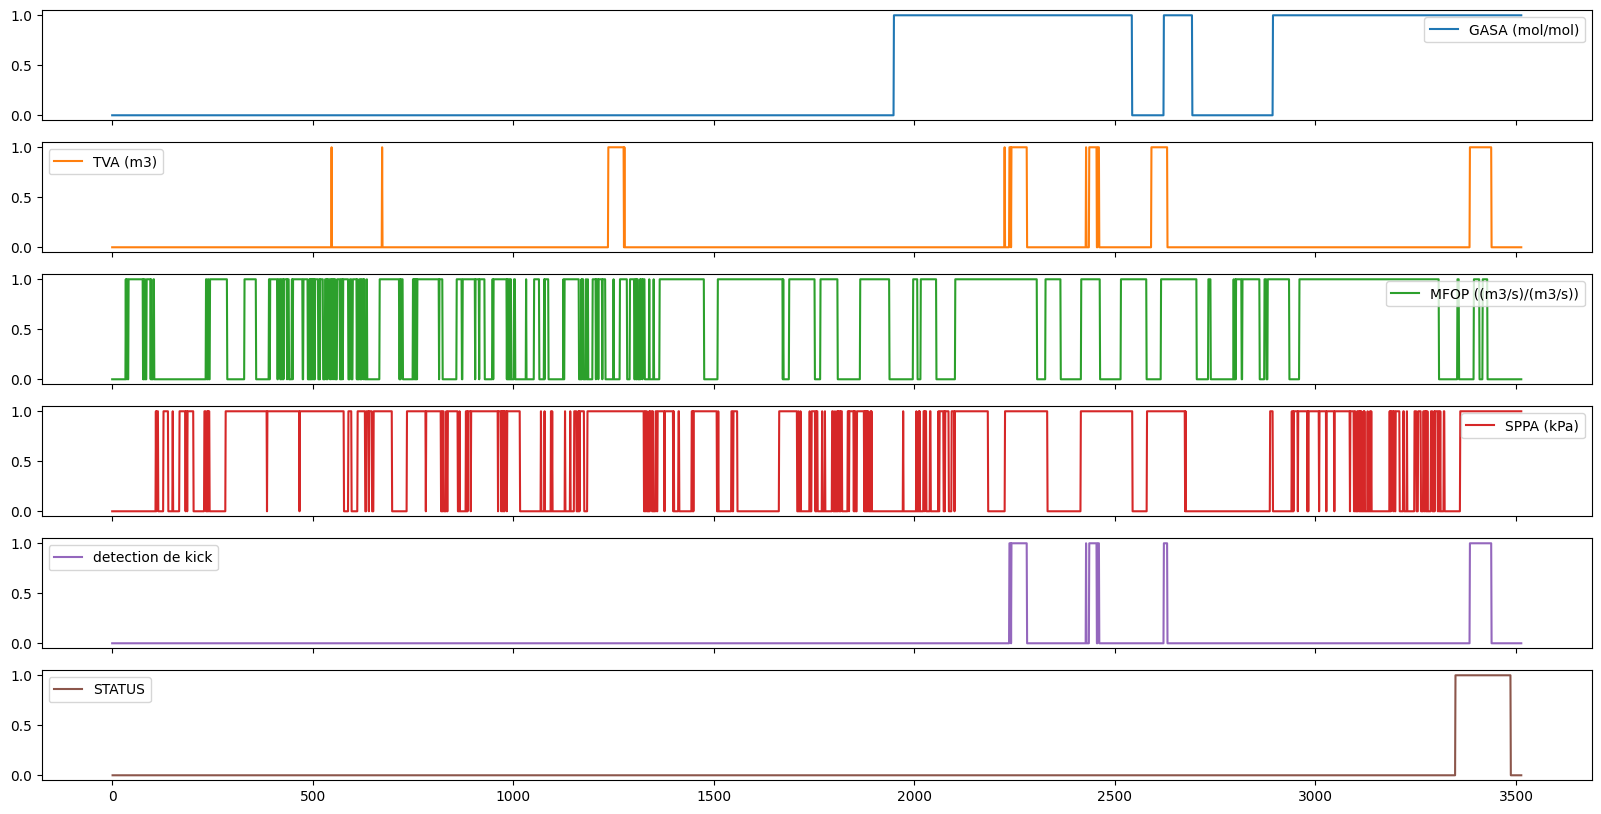

In [913]:
dftest.plot(subplots=True,figsize=(20,10))

In [914]:
dftest['STATUS'].value_counts()

0.0    3375
1.0     138
Name: STATUS, dtype: int64

In [700]:
c=['detection de kick','STATUS']

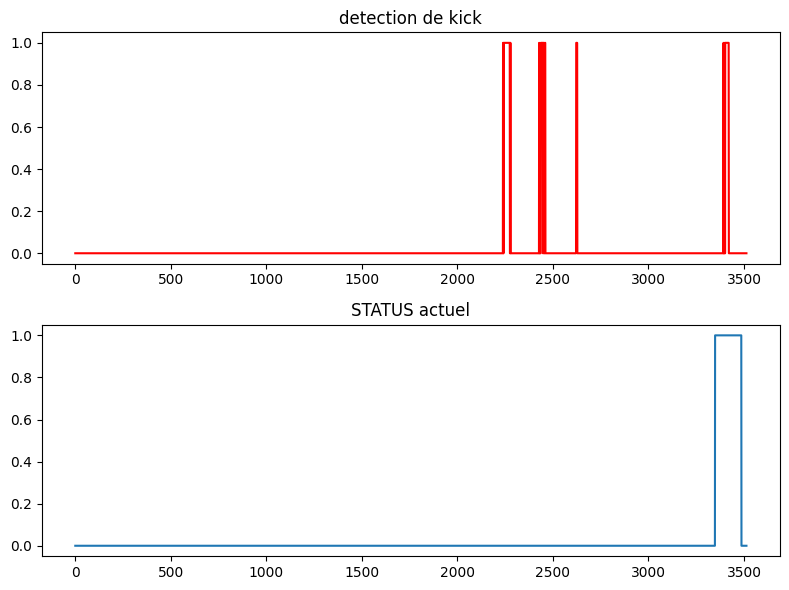

In [902]:

fig, axs = plt.subplots(2, 1, figsize=(8, 6))

# Plot col1
axs[0].plot(dftest['detection de kick'],c='red')
axs[0].set_title('detection de kick')

# Plot col2
axs[1].plot(dftest['STATUS'])
axs[1].set_title('STATUS actuel')

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

In [915]:
dftest=dftest.dropna()
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score,roc_auc_score
from sklearn.metrics import cohen_kappa_score
print(confusion_matrix(dftest['STATUS'], dftest['detection de kick']))
print("Accuracy:", accuracy_score(dftest['STATUS'], dftest['detection de kick']))
print("Precision:", precision_score(dftest['STATUS'], dftest['detection de kick']))
print("Recall:", recall_score(dftest['STATUS'], dftest['detection de kick']))
print("F1 Score:",f1_score(dftest['STATUS'], dftest['detection de kick']))


[[3299   76]
 [  84   54]]
Accuracy: 0.9544548818673498
Precision: 0.4153846153846154
Recall: 0.391304347826087
F1 Score: 0.40298507462686567


In [43]:
dftes=dftest
dftes.shape

(17244, 6)

In [44]:
dftes=dftes.drop_duplicates()

In [45]:
dftes.shape

(28, 6)

In [85]:
data[data['kick_recognition']==1].index

Int64Index([  610,   611,   612,   613,   666,   667,   668,   669,   670,
              671,
            ...
            53152, 53153, 53154, 53164, 53168, 53169, 53170, 53171, 53196,
            53197],
           dtype='int64', length=7131)

array([<Axes: >, <Axes: >], dtype=object)

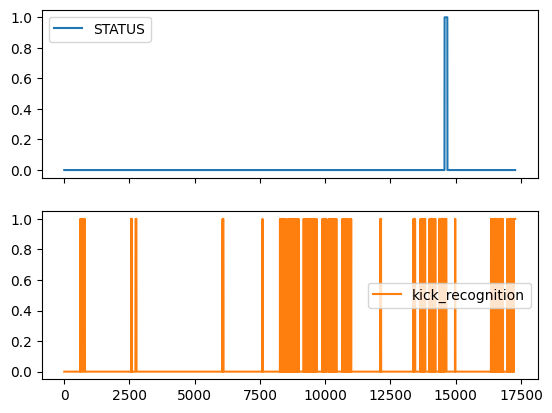

In [168]:
data[['STATUS','kick_recognition']].plot(subplots=True)